# Import libraries

In [8]:
import pandas as pd

# Import Data

In [9]:
data = pd.read_csv('data/heart.csv')

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
data.shape

(1025, 14)

# Renaming Data for Clarity

In [12]:
data = data.rename(columns ={'age' : 'Age',
                             'sex' : 'Sex', 
                             'cp' : 'Chest Pain Type',
                             'trestbps' : 'Resting Blood Pressure',
                             'chol' : 'Cholesterol Level',
                             'fbs' : 'Fasting Blood Sugar',
                             'restecg' : 'Resting ECG Results',
                             'thalach' : 'Max Hear Rate Achieved',
                             'exang' : 'Exercise Induced Angina',
                             'oldpeak' : 'Old Peak',
                             'slope' : 'Slope',
                             'ca' : 'CA',
                             'thal' : 'Thalamia',
                             'target' : 'Heart Disease'
                            })

# Preprocessing 
- Split our dataset into attributes and labels

In [13]:
data.dtypes

Age                          int64
Sex                          int64
Chest Pain Type              int64
Resting Blood Pressure       int64
Cholesterol Level            int64
Fasting Blood Sugar          int64
Resting ECG Results          int64
Max Hear Rate Achieved       int64
Exercise Induced Angina      int64
Old Peak                   float64
Slope                        int64
CA                           int64
Thalamia                     int64
Heart Disease                int64
dtype: object

In [15]:
X = data.iloc[:, 0:13]
y = data.iloc[:, -1]

**The X contains all of the labels in our dataset, except for the target**  
**The y is our prediction variable, and it contains the last column**

# Train Test Split

We need to avoid overfitting.  In order to do this, we divide our data into training and test splits.  This will give us a better idea of how our algorithm performed during our testing phase. 
This way our algorithm is tested on un-seen data.  This is usual of production application. 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**The above tells python to split the datasets into 80% training data and into 20% test data.**  
**This means that out of 1025 records, 820 will be used to train the data and 205 will be used to test it.**

# Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Prediction

In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [91]:
y_pred = classifier.predict(X_test)

# Evaluation the Algorithm

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[95 14]
 [ 8 88]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       109
           1       0.86      0.92      0.89        96

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [111]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred).round(2)

0.89

**Our model gives us an accuracy score of 89%**

In [94]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

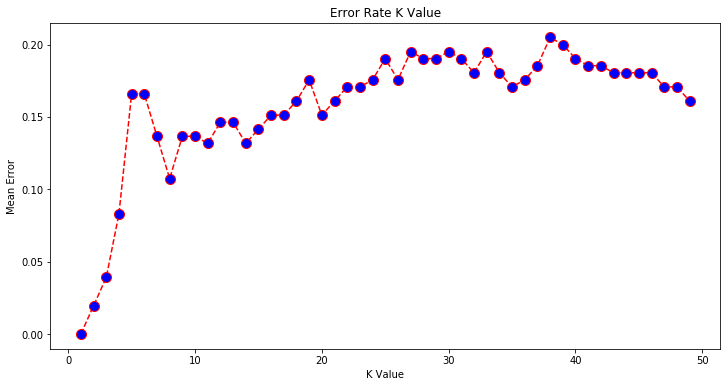

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Evaulatng which K is best for our model

In [96]:
scores = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    score = knn.score(X, y)
    scores.append([k, score])

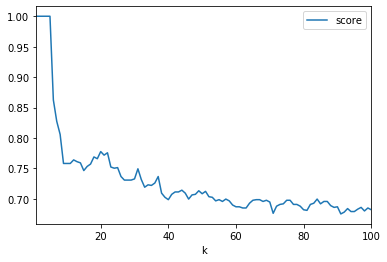

In [97]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

## Zooming in to the above graph to get the best K

In [103]:
scores = []
for k in range(5,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = knn.score(X_test, y_test)
    scores.append([k, score])

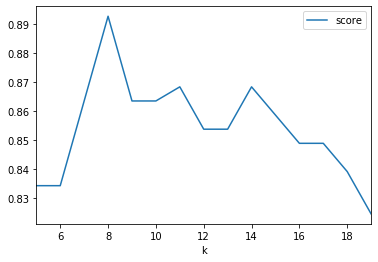

In [104]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [114]:
data.head()

,k,score
0,5,0.834146
1,6,0.834146
2,7,0.863415
3,8,0.892683
4,9,0.863415


**- K number of 8 will give us the best accuracy score**

# Prediction 

**Suppose I have a patient with thw following information**

In [123]:
new_patient = pd.DataFrame({
 'Age'                     : 24,
 'Sex'                     : 1,
 'Chest Pain Type'         : 1,
 'Resting Blood Pressure'  : 150,
 'Cholesterol'             : 155,
 'Fasting Blood Sugar'     : 1,
 'Resting ECG'             : 0,
 'Max Heart Rate'          : 189,
 'Exercise Induced Angina' : 0,
 'oldpeak'                 : 0,
 'slope'                   : 2,
 'ca'                      : 1,
 'thalassemia'             : 0

}, index = [0])

In [124]:
new_patient

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,oldpeak,slope,ca,thalassemia
0,24,1,1,150,155,1,0,189,0,0,2,1,0


In [125]:
knn.predict_proba(new_patient).round(2)

array([[0.32, 0.68]])

In [126]:
knn.predict(my_info)

array([1], dtype=int64)